Train and Evaluation results

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import numpy as np
import tensorboard
import os
%load_ext tensorboard

exp_dir_root = "/home/ekumar/master_thesis/results/training/december/iqn/"

sns.set_theme(style="whitegrid")
sns.color_palette("Set2")
plt.rcParams['figure.figsize'] = (25.0, 10.0)


def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

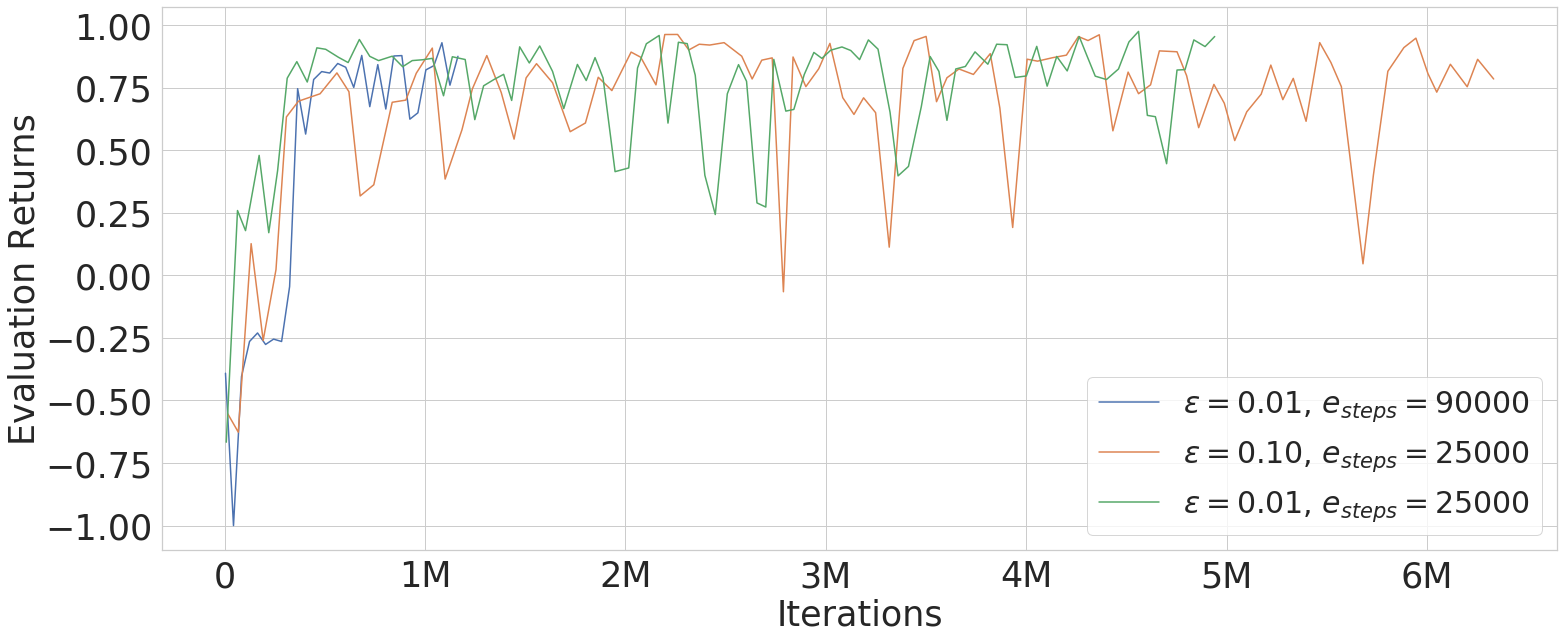

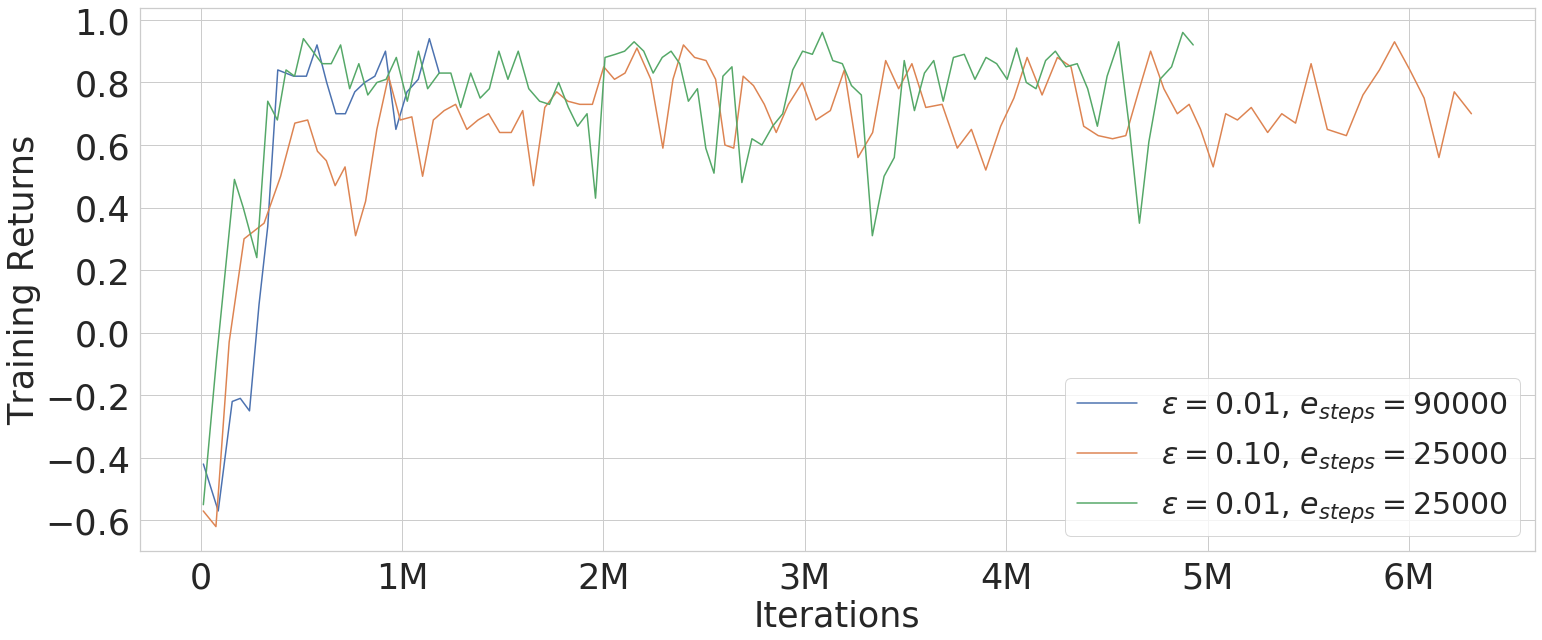

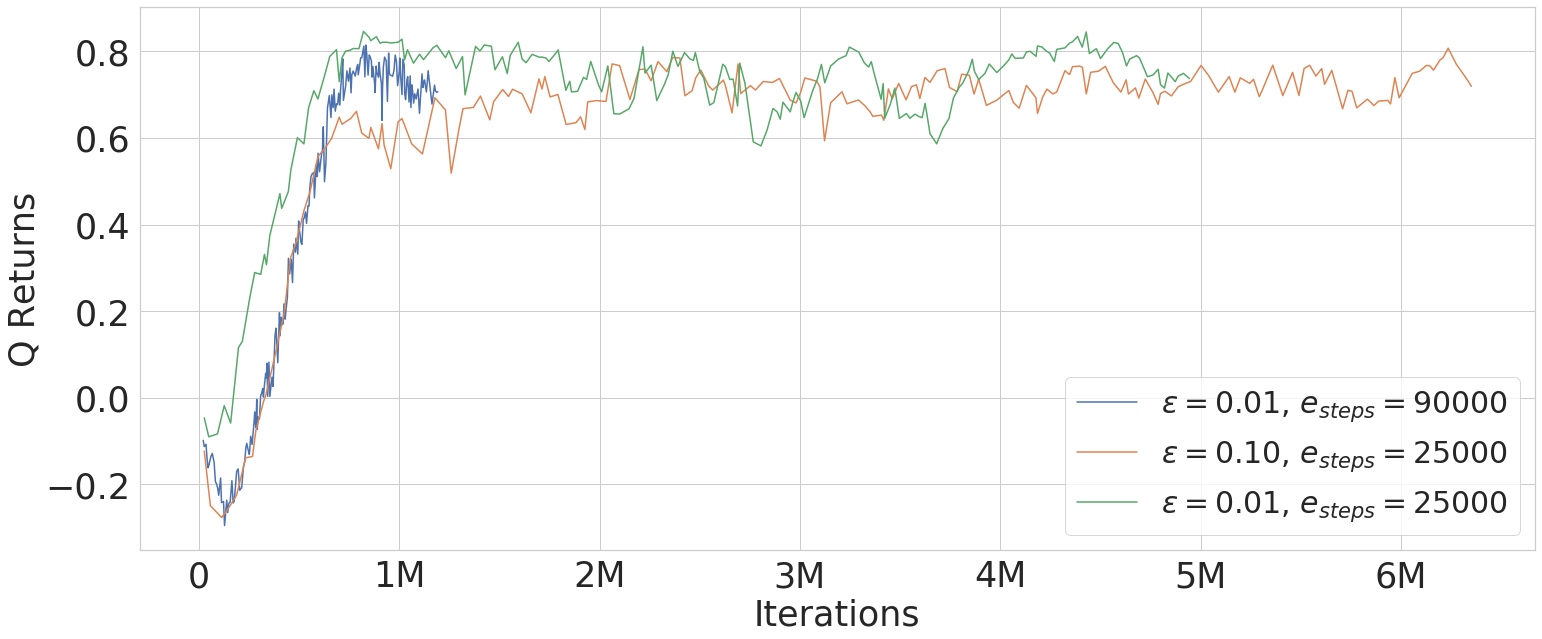

In [21]:
mr_90k = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-mean_return.csv")
mr_90k = mr_90k.rename(columns={'Value': 'Evaluation Returns', 'Step': 'Steps'})
mr_he = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-mean_return(1).csv")
mr_he = mr_he.rename(columns={'Value': 'Evaluation Returns', 'Step': 'Steps'})
mr_baseline = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-mean_return(2).csv")
mr_baseline = mr_baseline.rename(columns={'Value': 'Evaluation Returns', 'Step': 'Steps'})


fig = plt.figure()
ax = fig.add_subplot(111)
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
sns.lineplot(x=mr_90k.Steps[::10], y='Evaluation Returns', data=mr_90k, label="$\epsilon=0.01$, $e_{steps}=90000$")
sns.lineplot(x=mr_he.Steps[::10], y='Evaluation Returns', data=mr_he, label="$\epsilon=0.10$, $e_{steps}=25000$")
sns.lineplot(x=mr_baseline.Steps[::10], y='Evaluation Returns', data=mr_baseline, label="$\epsilon=0.01$, $e_{steps}=25000$")
plt.ylabel('Evaluation Returns', fontsize=35)
plt.xlabel('Iterations', fontsize=35)
plt.legend(fontsize=30)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.savefig('mr_std_iqn.svg')



# mr_90k.head(10)

tr_90k = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-return_train.csv")
tr_90k = tr_90k.rename(columns={'Value': 'Training Returns', 'Step': 'Steps'})
tr_he = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-return_train(1).csv")
tr_he = tr_he.rename(columns={'Value': 'Training Returns', 'Step': 'Steps'})
tr_bl = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-return_train(2).csv")
tr_bl = tr_bl.rename(columns={'Value': 'Training Returns', 'Step': 'Steps'})

# plt.figure()
# sns.lineplot(x=tr_90k.index, y='Training', data=tr_90k, label="Slow Decay")

fig = plt.figure()
ax = fig.add_subplot(111)
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
sns.lineplot(x=tr_90k.Steps[::5], y='Training Returns', data=tr_90k, label="$\epsilon=0.01$, $e_{steps}=90000$")
sns.lineplot(x=tr_he.Steps[::5], y='Training Returns', data=tr_he, label="$\epsilon=0.10$, $e_{steps}=25000$")
sns.lineplot(x=tr_bl.Steps[::5], y='Training Returns', data=tr_bl, label="$\epsilon=0.01$, $e_{steps}=25000$")
plt.ylabel('Training Returns', fontsize=35)
plt.xlabel('Iterations', fontsize=35)
plt.legend(fontsize=30)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.savefig('tr_std_iqn.svg')


mq_90k = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-stats_mean_Q.csv")
mq_90k = mq_90k.rename(columns={'Value': 'Q Returns', 'Step': 'Steps'})
mq_he = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-stats_mean_Q(1).csv")
mq_he = mq_he.rename(columns={'Value': 'Q Returns', 'Step': 'Steps'})
mq_bl = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-stats_mean_Q(2).csv")
mq_bl = mq_bl.rename(columns={'Value': 'Q Returns', 'Step': 'Steps'})

print()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
sns.lineplot(x=mq_90k.Steps[::5], y='Q Returns', data=mq_90k, label="$\epsilon=0.01$, $e_{steps}=90000$")
sns.lineplot(x=mq_he.Steps[::5], y='Q Returns', data=mq_he, label="$\epsilon=0.10$, $e_{steps}=25000$")
sns.lineplot(x=mq_bl.Steps[::5], y='Q Returns', data=mq_bl, label="$\epsilon=0.01$, $e_{steps}=25000$")
plt.ylabel('Q Returns', fontsize=35)
plt.xlabel('Iterations', fontsize=35)
plt.legend(fontsize=30)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.savefig('meanQ_std_iqn.svg')


# mr_90k.head(10), tr_90k.head(10)

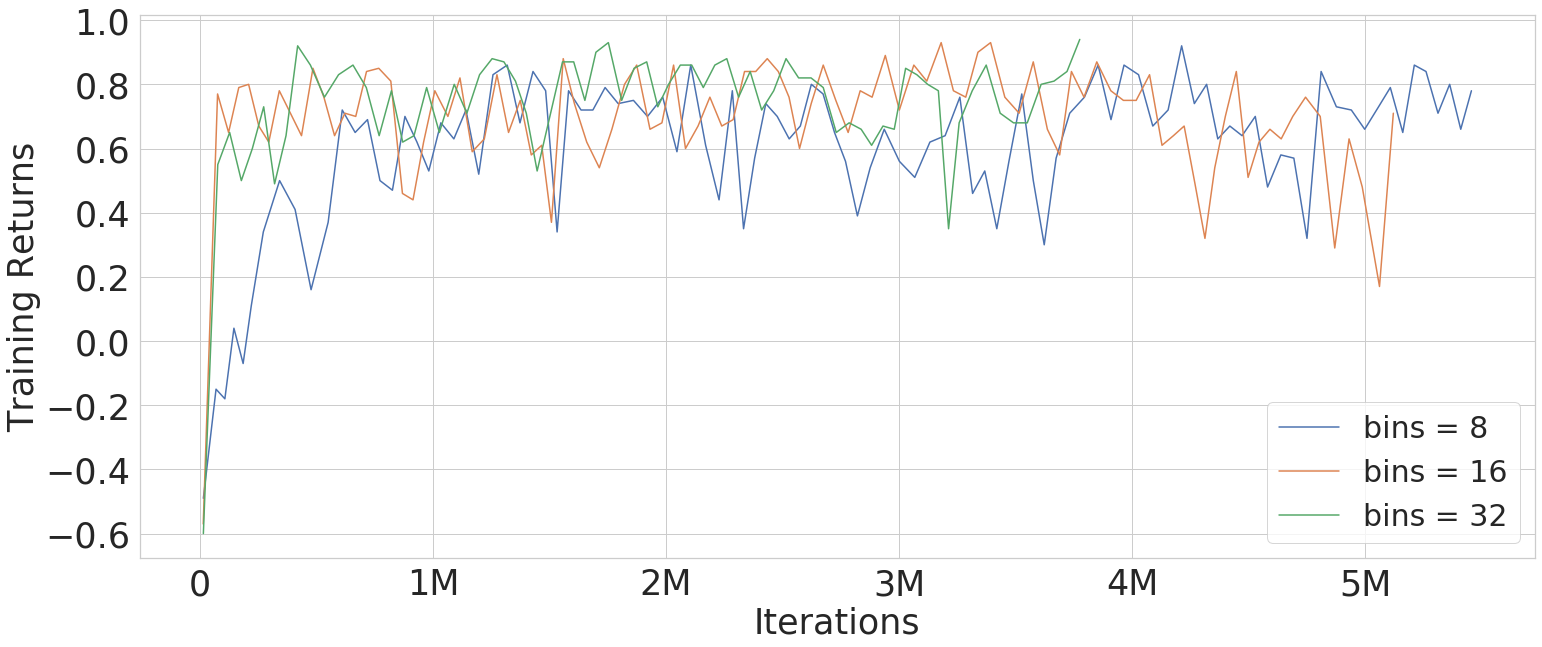

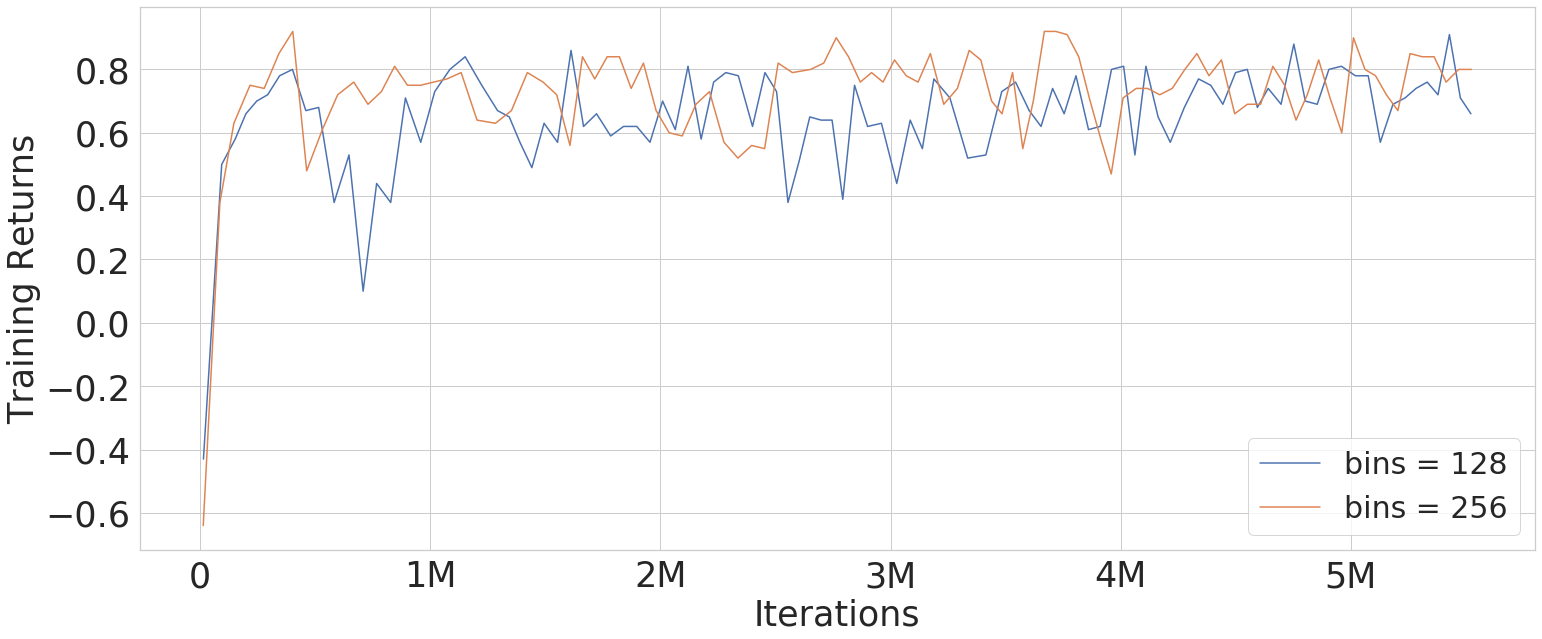

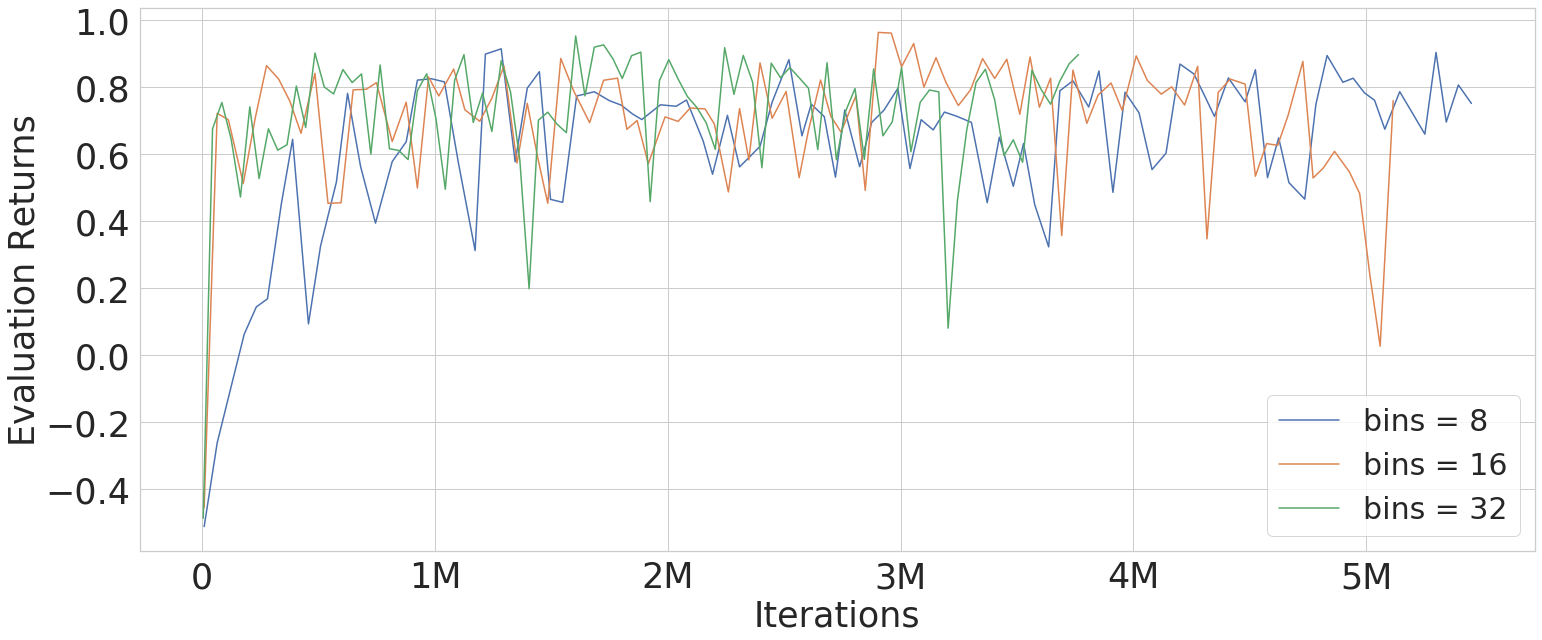

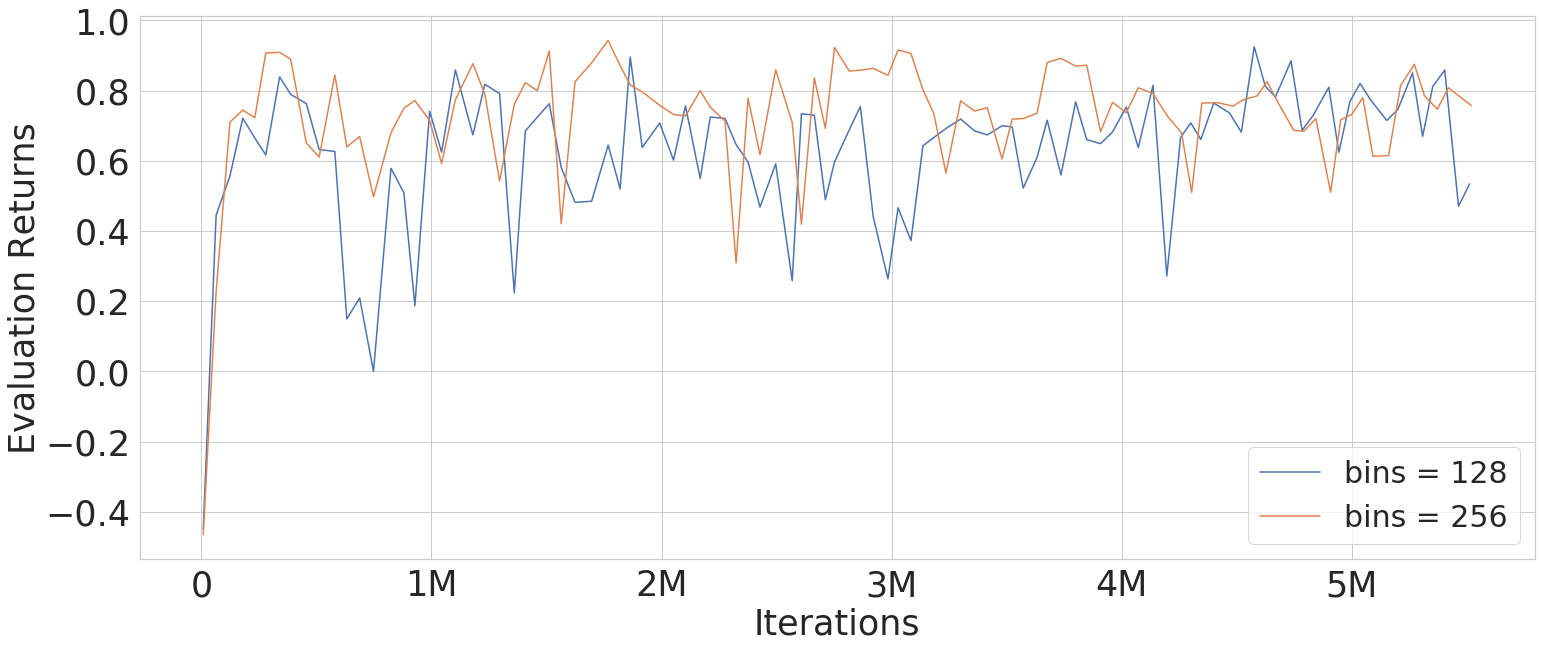

In [24]:
s2_8 = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-mean_return(3).csv")
s2_8 = s2_8.rename(columns={'Value': 'Evaluation Returns', 'Step': 'Steps'})
s2_16 = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-mean_return(4).csv")
s2_16 = s2_16.rename(columns={'Value': 'Evaluation Returns', 'Step': 'Steps'})
s2_32 = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-mean_return(5).csv")
s2_32 = s2_32.rename(columns={'Value': 'Evaluation Returns', 'Step': 'Steps'})
s2_128 = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-mean_return(6).csv")
s2_128 = s2_128.rename(columns={'Value': 'Evaluation Returns', 'Step': 'Steps'})
s2_256 = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-mean_return(7).csv")
s2_256 = s2_256.rename(columns={'Value': 'Evaluation Returns', 'Step': 'Steps'})

s2_8tr = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-return_train(3).csv")
s2_8tr = s2_8tr.rename(columns={'Value': 'Training Returns', 'Step': 'Steps'})
s2_16tr = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-return_train(4).csv")
s2_16tr = s2_16tr.rename(columns={'Value': 'Training Returns', 'Step': 'Steps'})
s2_32tr = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-return_train(5).csv")
s2_32tr = s2_32tr.rename(columns={'Value': 'Training Returns', 'Step': 'Steps'})
s2_128tr = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-return_train(6).csv")
s2_128tr = s2_128tr.rename(columns={'Value': 'Training Returns', 'Step': 'Steps'})
s2_256tr = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-return_train(7).csv")
s2_256tr = s2_256tr.rename(columns={'Value': 'Training Returns', 'Step': 'Steps'})



fig = plt.figure()
ax = fig.add_subplot(111)
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
sns.lineplot(x=s2_8tr.Steps[::5], y='Training Returns', data=s2_8tr, label="bins = 8")
sns.lineplot(x=s2_16tr.Steps[::5], y='Training Returns', data=s2_16tr, label="bins = 16")
sns.lineplot(x=s2_32tr.Steps[::5], y='Training Returns', data=s2_32tr, label="bins = 32")

plt.ylabel('Training Returns', fontsize=35)
plt.xlabel('Iterations', fontsize=35)
plt.legend(fontsize=30)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.savefig('tr_beiqn_8_16_32.svg')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
# sns.lineplot(x=s2_8tr.Steps, y='Training Returns', data=s2_8tr, label="bins = 64")
sns.lineplot(x=s2_128tr.Steps[::5], y='Training Returns', data=s2_128tr, label="bins = 128")
sns.lineplot(x=s2_256tr.Steps[::5], y='Training Returns', data=s2_256tr, label="bins = 256")

plt.ylabel('Training Returns', fontsize=35)
plt.xlabel('Iterations', fontsize=35)
plt.legend(fontsize=30)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.savefig('tr_beiqn_128_256.svg')



fig = plt.figure()
ax = fig.add_subplot(111)
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
sns.lineplot(x=s2_8.Steps[::10], y='Evaluation Returns', data=s2_8, label="bins = 8")
sns.lineplot(x=s2_16.Steps[::10], y='Evaluation Returns', data=s2_16, label="bins = 16")
sns.lineplot(x=s2_32.Steps[::10], y='Evaluation Returns', data=s2_32, label="bins = 32")

plt.ylabel('Evaluation Returns', fontsize=35)
plt.xlabel('Iterations', fontsize=35)
plt.legend(fontsize=30)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.savefig('mr_beiqn_8_16_32.svg')


fig = plt.figure()
ax = fig.add_subplot(111)
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
# sns.lineplot(x=s2_8tr.Steps, y='Training Returns', data=s2_8tr, label="bins = 64")
sns.lineplot(x=s2_128.Steps[::10], y='Evaluation Returns', data=s2_128, label="bins = 128")
sns.lineplot(x=s2_256.Steps[::10], y='Evaluation Returns', data=s2_256, label="bins = 256")

plt.ylabel('Evaluation Returns', fontsize=35)
plt.xlabel('Iterations', fontsize=35)
plt.legend(fontsize=30)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.savefig('mr_beiqn_128_256.svg')





# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
# sns.lineplot(x=s2_16.Steps, y='Evaluation Returns', data=s2_16, label="Evaluation")
# sns.lineplot(x=s2_8.Steps, y='Evaluation Returns', data=s2_8, label="Evaluation")


# plt.ylabel('TH + DISC(16)', fontsize=16)
# plt.xlabel('Iterations', fontsize=16)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)





# mr_90k = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-mean_return.csv")
# mr_90k = mr_90k.rename(columns={'Value': 'Evaluation Returns', 'Step': 'Steps'})
# mr_he = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-mean_return(1).csv")
# mr_he = mr_he.rename(columns={'Value': 'Evaluation Returns', 'Step': 'Steps'})
# mr_baseline = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-mean_return(2).csv")
# mr_baseline = mr_baseline.rename(columns={'Value': 'Evaluation Returns', 'Step': 'Steps'})


# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
# sns.lineplot(x=mr_90k.Steps, y='Evaluation Returns', data=mr_90k, label="Slow Decay")
# sns.lineplot(x=mr_he.Steps, y='Evaluation Returns', data=mr_he, label="High End Exploration")
# sns.lineplot(x=mr_baseline.Steps, y='Evaluation Returns', data=mr_baseline, label="Default")
# plt.ylabel('Evaluation Returns', fontsize=16)
# plt.xlabel('Iterations', fontsize=16)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)


# mr_90k.head(10)

# tr_90k = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-return_train.csv")
# tr_90k = tr_90k.rename(columns={'Value': 'Training Returns', 'Step': 'Steps'})
# tr_he = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-return_train(1).csv")
# tr_he = tr_he.rename(columns={'Value': 'Training Returns', 'Step': 'Steps'})
# tr_bl = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-return_train(2).csv")
# tr_bl = tr_bl.rename(columns={'Value': 'Training Returns', 'Step': 'Steps'})

# # plt.figure()
# # sns.lineplot(x=tr_90k.index, y='Training', data=tr_90k, label="Slow Decay")

# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
# sns.lineplot(x=tr_90k.Steps, y='Training Returns', data=tr_90k, label="Slow Exploration Decay")
# sns.lineplot(x=tr_he.Steps, y='Training Returns', data=tr_he, label="Higher End Exploration")
# sns.lineplot(x=tr_bl.Steps, y='Training Returns', data=tr_bl, label="Default")
# plt.ylabel('Training Returns', fontsize=16)
# plt.xlabel('Iterations', fontsize=16)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)


# mq_90k = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-stats_mean_Q.csv")
# mq_90k = mq_90k.rename(columns={'Value': 'Q Returns', 'Step': 'Steps'})
# mq_he = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-stats_mean_Q(1).csv")
# mq_he = mq_he.rename(columns={'Value': 'Q Returns', 'Step': 'Steps'})
# mq_bl = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-stats_mean_Q(2).csv")
# mq_bl = mq_bl.rename(columns={'Value': 'Q Returns', 'Step': 'Steps'})

# print()
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
# sns.lineplot(x=mq_90k.Steps, y='Q Returns', data=mq_90k, label="Slow Exploration Decay")
# sns.lineplot(x=mq_he.Steps, y='Q Returns', data=mq_he, label="Higher End Exploration")
# sns.lineplot(x=mq_bl.Steps, y='Q Returns', data=mq_bl, label="Default")
# plt.ylabel('Q Returns', fontsize=16)
# plt.xlabel('Iterations', fontsize=16)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)

# mr_90k.head(10), tr_90k.head(10)

      Wall time  Steps  Evaluation Returns
0  1.614817e+09   8000           -0.856322
1  1.614817e+09  16000           -0.906077
2  1.614817e+09  24000            1.000000
3  1.614818e+09  32000            0.994118
4  1.614818e+09  40000            1.000000
5  1.614818e+09  48000            0.798611
6  1.614819e+09  56000            1.000000
7  1.614819e+09  64000            0.807407
8  1.614819e+09  72000            1.000000
9  1.614820e+09  80000            1.000000


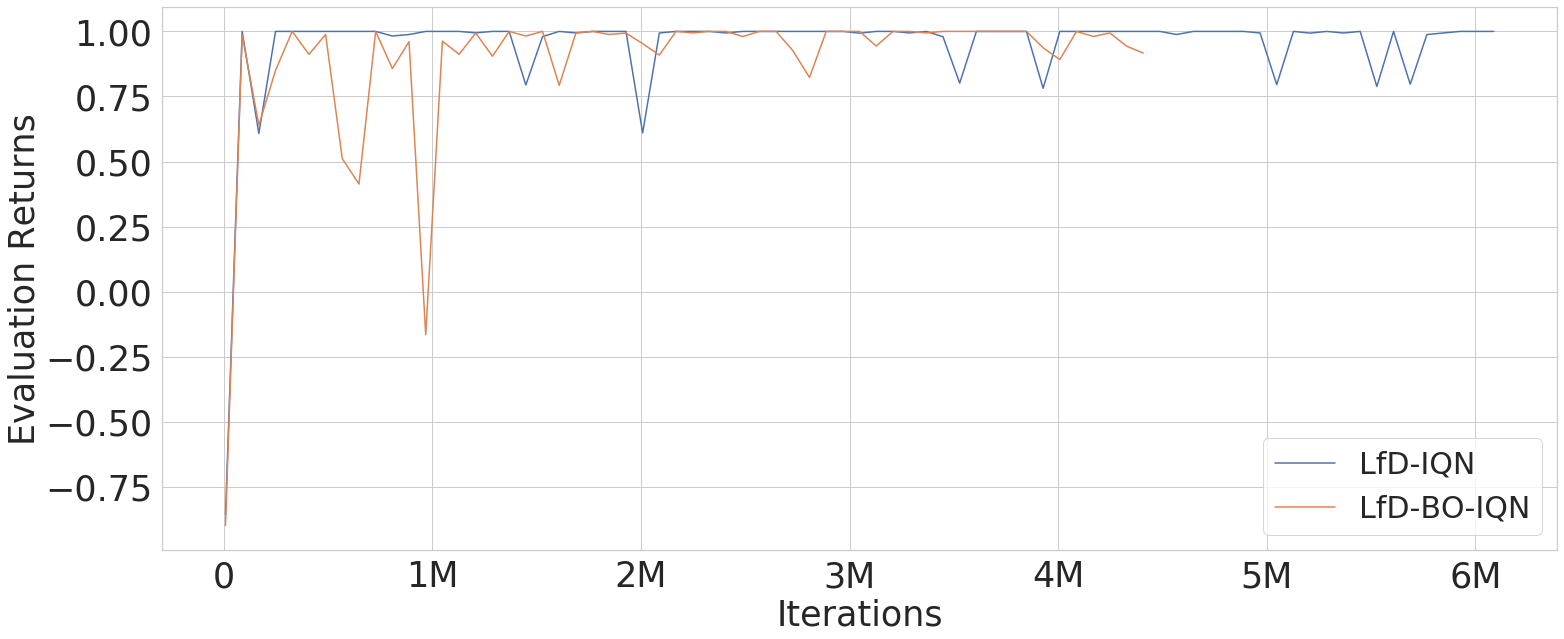

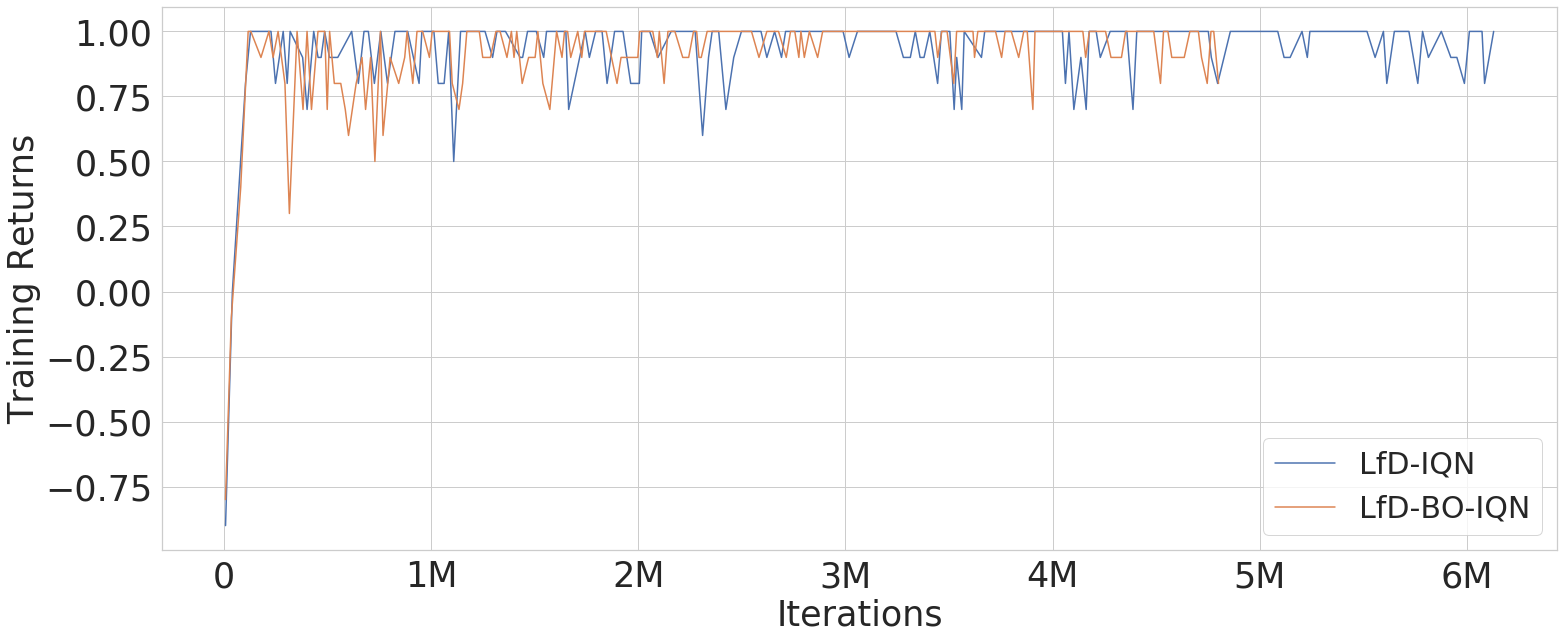

In [23]:
mr_lfd_iqn = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-mean_return(8).csv")
mr_lfd_iqn = mr_lfd_iqn.rename(columns={'Value': 'Evaluation Returns', 'Step': 'Steps'})
mr_lfd_bo_iqn = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-mean_return(9).csv")
mr_lfd_bo_iqn = mr_lfd_bo_iqn.rename(columns={'Value': 'Evaluation Returns', 'Step': 'Steps'})


fig = plt.figure()
ax = fig.add_subplot(111)
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.xticks()
sns.lineplot(x=mr_lfd_iqn.Steps[::10], y='Evaluation Returns', data=mr_lfd_iqn, label="LfD-IQN")
sns.lineplot(x=mr_lfd_bo_iqn.Steps[::10], y='Evaluation Returns', data=mr_lfd_bo_iqn, label="LfD-BO-IQN")
plt.ylabel('Evaluation Returns', fontsize=35)
plt.xlabel('Iterations', fontsize=35)
plt.legend(fontsize=30)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.savefig('mr_lfds.svg')

print(mr_lfd_iqn.head(10))

tr_lfd_iqn = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-return_train(8).csv")
tr_lfd_iqn = tr_lfd_iqn.rename(columns={'Value': 'Training Returns', 'Step': 'Steps'})
tr_lfd_bo_iqn = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-return_train(9).csv")
tr_lfd_bo_iqn = tr_lfd_bo_iqn.rename(columns={'Value': 'Training Returns', 'Step': 'Steps'})


fig = plt.figure()
ax = fig.add_subplot(111)
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.xticks()
sns.lineplot(x=tr_lfd_iqn.Steps[::5], y='Training Returns', data=tr_lfd_iqn, label="LfD-IQN")
sns.lineplot(x=tr_lfd_bo_iqn.Steps[::5], y='Training Returns', data=tr_lfd_bo_iqn, label="LfD-BO-IQN")
plt.ylabel('Training Returns', fontsize=35)
plt.xlabel('Iterations', fontsize=35)
plt.legend(fontsize=30)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.savefig('tr_lfds.svg')

# mr_90k.head(10)

# tr_90k = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-return_train.csv")
# tr_90k = tr_90k.rename(columns={'Value': 'Training Returns', 'Step': 'Steps'})
# tr_he = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-return_train(1).csv")
# tr_he = tr_he.rename(columns={'Value': 'Training Returns', 'Step': 'Steps'})
# tr_bl = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-return_train(2).csv")
# tr_bl = tr_bl.rename(columns={'Value': 'Training Returns', 'Step': 'Steps'})

# # plt.figure()
# # sns.lineplot(x=tr_90k.index, y='Training', data=tr_90k, label="Slow Decay")

# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
# sns.lineplot(x=tr_90k.Steps, y='Training Returns', data=tr_90k, label="$\epsilon=0.01$, $e_{steps}=90000$")
# sns.lineplot(x=tr_he.Steps, y='Training Returns', data=tr_he, label="$\epsilon=0.10$, $e_{steps}=25000$")
# sns.lineplot(x=tr_bl.Steps, y='Training Returns', data=tr_bl, label="$\epsilon=0.01$, $e_{steps}=25000$")
# plt.ylabel('Training Returns', fontsize=35)
# plt.xlabel('Iterations', fontsize=35)
# plt.legend(fontsize=30)
# plt.xticks(fontsize=35)
# plt.yticks(fontsize=35)
# plt.savefig('tr_std_iqn.svg')


# mq_90k = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-stats_mean_Q.csv")
# mq_90k = mq_90k.rename(columns={'Value': 'Q Returns', 'Step': 'Steps'})
# mq_he = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-stats_mean_Q(1).csv")
# mq_he = mq_he.rename(columns={'Value': 'Q Returns', 'Step': 'Steps'})
# mq_bl = pd.read_csv("/home/ekumar/Downloads/run-agent_summaries-tag-stats_mean_Q(2).csv")
# mq_bl = mq_bl.rename(columns={'Value': 'Q Returns', 'Step': 'Steps'})

# print()
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
# sns.lineplot(x=mq_90k.Steps, y='Q Returns', data=mq_90k, label="$\epsilon=0.01$, $e_{steps}=90000$")
# sns.lineplot(x=mq_he.Steps, y='Q Returns', data=mq_he, label="$\epsilon=0.10$, $e_{steps}=25000$")
# sns.lineplot(x=mq_bl.Steps, y='Q Returns', data=mq_bl, label="$\epsilon=0.01$, $e_{steps}=25000$")
# plt.ylabel('Q Returns', fontsize=35)
# plt.xlabel('Iterations', fontsize=35)
# plt.legend(fontsize=30)
# plt.xticks(fontsize=35)
# plt.yticks(fontsize=35)
# plt.savefig('meanQ_std_iqn.svg')


# mr_90k.head(10), tr_90k.head(10)